# The Sparks Foundation Internship

# Prediction using Decision Tree Algorithm
Saswata Paul Choudhury

We have 'iris' data set. our job is to Create the Decision Tree classifier and visualize it graphically.

# Data Exploration and visualization

In [13]:
iris<-read.csv("C:/Users/user/Desktop/spark/iris.csv")

In [15]:
library(rpart)

library(caret)

In [16]:
names(iris)

[1] "Id"            "SepalLengthCm" "SepalWidthCm"  "PetalLengthCm"
[5] "PetalWidthCm"  "Species"

In [17]:
table(iris$Species)


    Iris-setosa Iris-versicolor  Iris-virginica 
             50              50              50 

In [18]:
library(ggplot2)

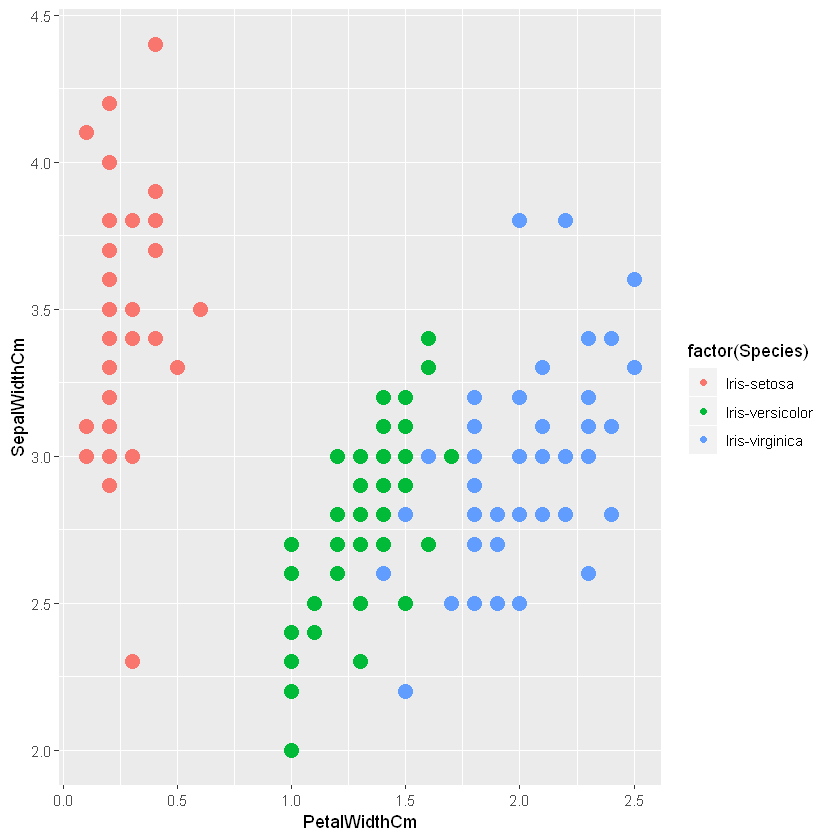

In [19]:
ggplot(iris, aes(PetalWidthCm, SepalWidthCm, colour=factor(Species), size=I(4)))+geom_point()

In [25]:
library(party)

# Classification tree and visualization: 

In [29]:
library(tree)

In [106]:
tree1<-tree(Species~ PetalWidthCm+SepalWidthCm,data=iris)
summary(tree1)


Classification tree:
tree(formula = Species ~ PetalWidthCm + SepalWidthCm, data = iris)
Number of terminal nodes:  5 
Residual mean deviance:  0.204 = 29.57 / 145 
Misclassification error rate: 0.03333 = 5 / 150 

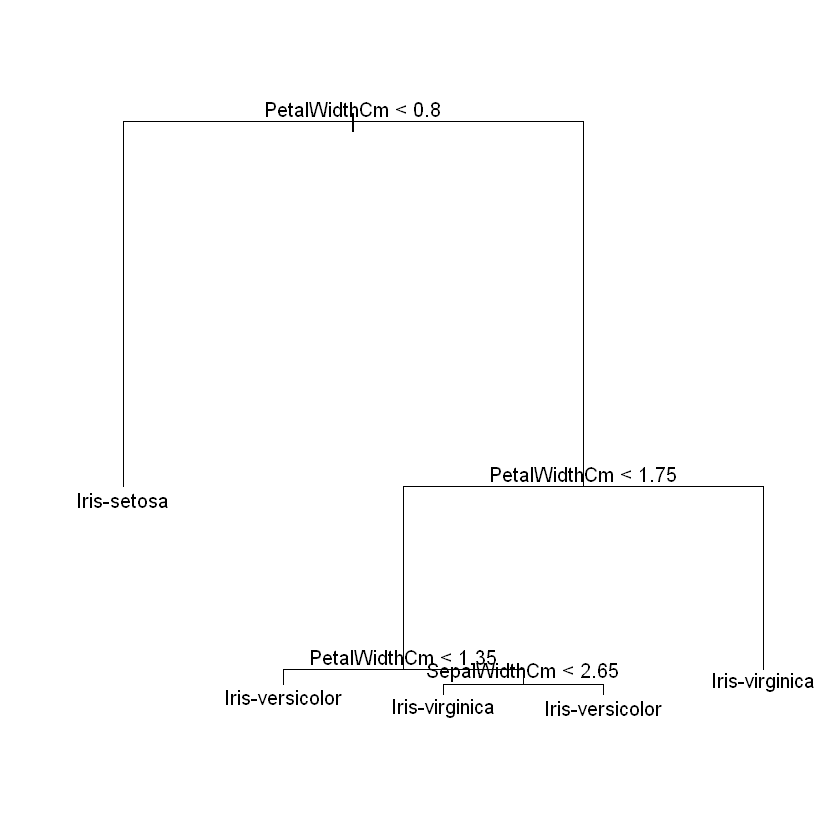

In [31]:
plot(tree1)
text(tree1)

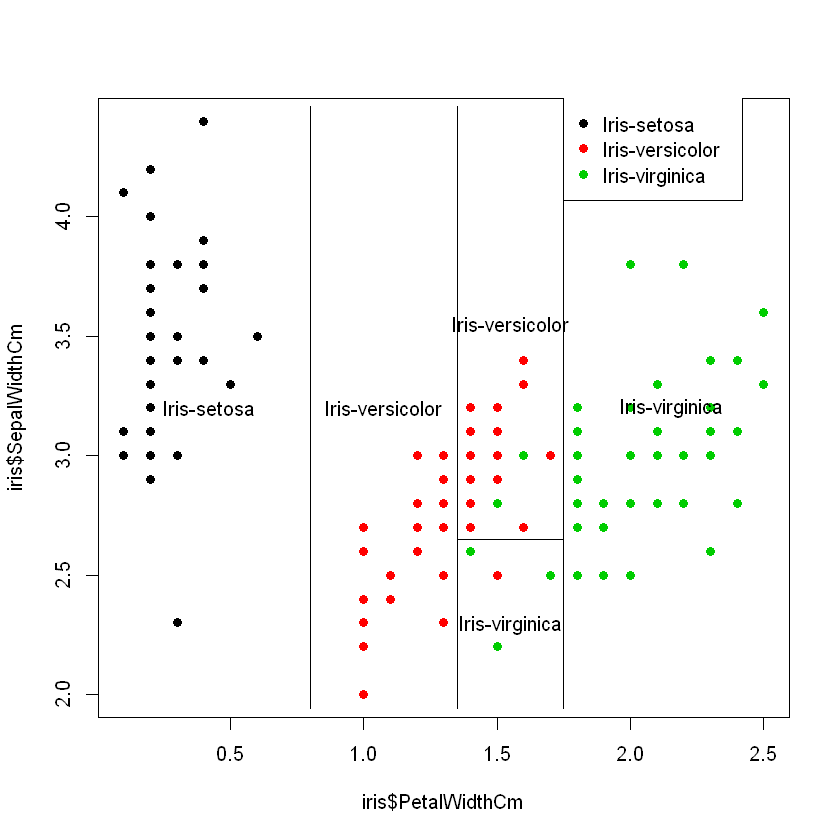

In [45]:
plot(iris$PetalWidthCm,iris$SepalWidthCm,pch=19,col=as.numeric(iris$Species))
partition.tree(tree1,label="Species",add=TRUE)
legend(1.75,4.5,legend=unique(iris$Species),col=unique(as.numeric(iris$Species)),pch=19)


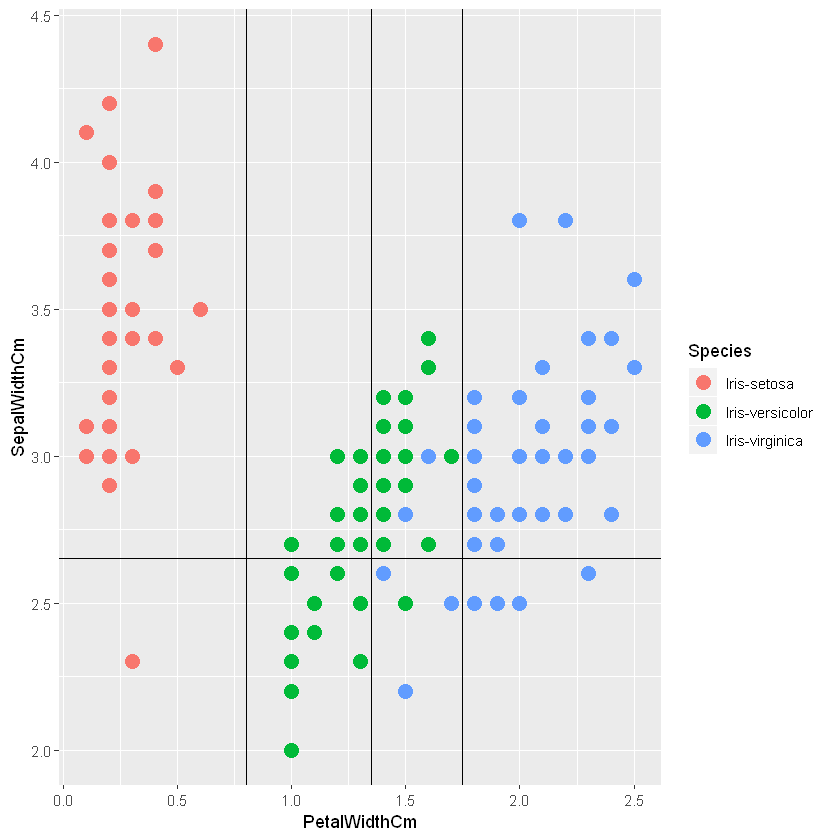

In [32]:
graph <- qplot(PetalWidthCm, SepalWidthCm, data=iris, colour=Species, size=I(4))
graph + geom_hline(aes(yintercept=2.65)) + geom_vline(aes(xintercept=0.8)) + geom_vline(aes(xintercept=1.75)) + geom_vline(aes(xintercept=1.35))


In [33]:
tree1 <- tree(Species ~ SepalWidthCm + SepalLengthCm+ PetalLengthCm + PetalWidthCm, data = iris)
summary(tree1)
 



Classification tree:
tree(formula = Species ~ SepalWidthCm + SepalLengthCm + PetalLengthCm + 
    PetalWidthCm, data = iris)
Variables actually used in tree construction:
[1] "PetalLengthCm" "PetalWidthCm"  "SepalLengthCm"
Number of terminal nodes:  6 
Residual mean deviance:  0.1253 = 18.05 / 144 
Misclassification error rate: 0.02667 = 4 / 150 

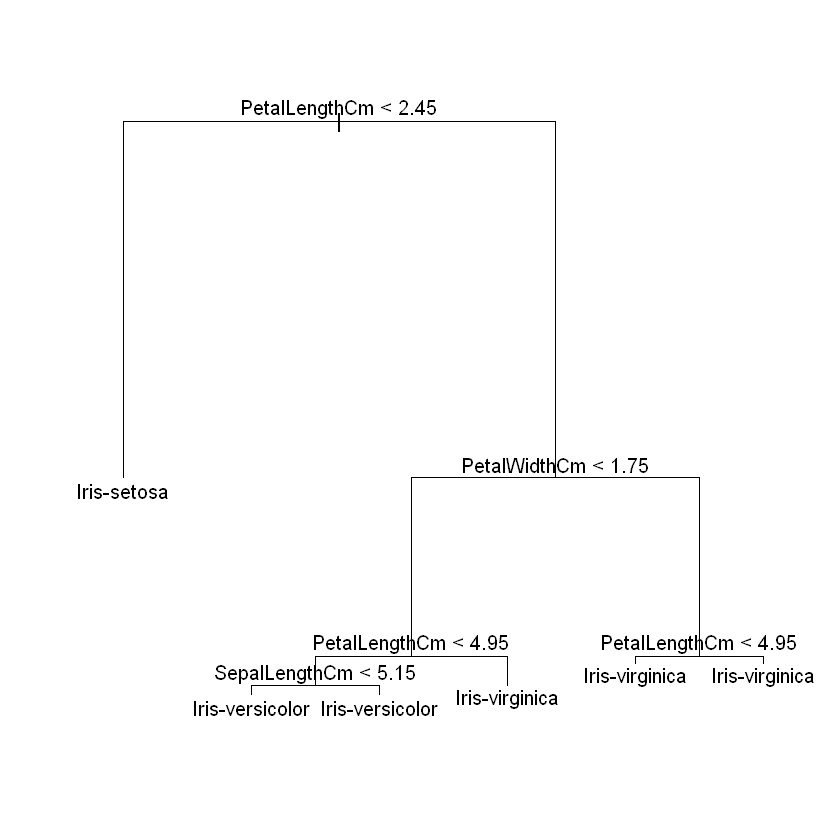

In [34]:
plot(tree1)
text(tree1)

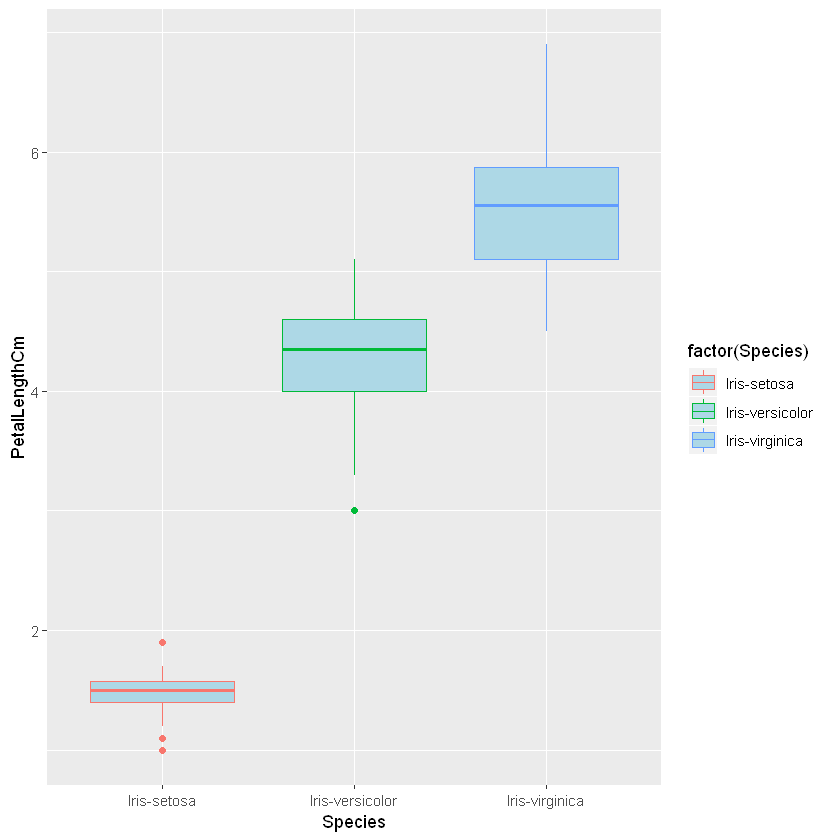

In [35]:
ggplot(iris, aes(Species,PetalLengthCm, col=factor(Species)))+geom_boxplot(fill="light blue")

# Decision Tree classifier

In [ ]:

# load libraries
library(rpart)
library(rattle)
 
rpart <- rpart(Species ~.-Id, data=iris, method="class",)
 
rpart
n= 150 

In [5]:
library(caTools)


Warning message:
"package 'caTools' was built under R version 3.6.3"


In [49]:
# spliting data into test and train set and model building
set.seed(123)
split=sample.split(iris$Species, SplitRatio=0.7)
train=subset(iris,split==TRUE)
test=subset(iris,split==FALSE)
rpart <- rpart(Species ~.-Id, data=train, method="class",)

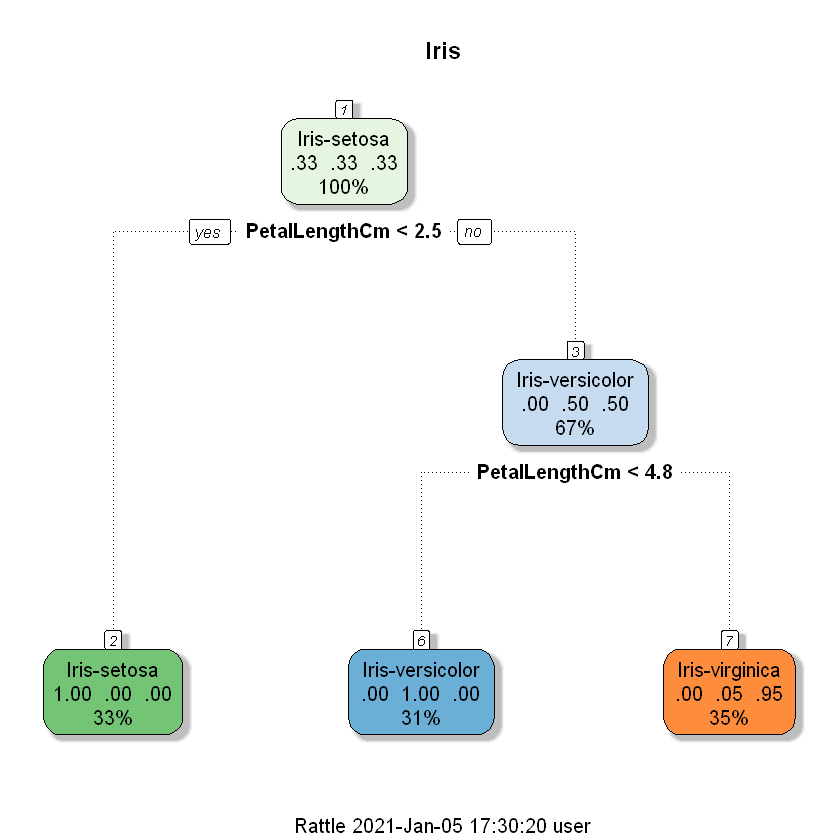

In [50]:
fancyRpartPlot(rpart, main="Iris")

In [89]:
#predicting using test dataset
x<- ctree(Species ~.-Id, data=train)
lr.predict<-predict(x,test[,1:5],probability=TRUE)
table(predict(x,test[,1:5]),test$Species)

                 
                  Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              15               0              0
  Iris-versicolor           0              15              0
  Iris-virginica            0               0             15